<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20211224_apt_trade_monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [60]:
df_apt_trade = pd.read_csv("행정구역별_아파트매매거래현황_20211224102444.csv", encoding="cp949")
df_apt_trade

,행정구역별(1),시점,호수 (호수)
0,서울특별시,2021. 09,3874
1,서울특별시,2021. 08,5054
2,서울특별시,2021. 07,4646
3,서울특별시,2021. 06,4240
4,서울특별시,2021. 05,5090
...,...,...,...
128,서울특별시,2011. 01,5868
129,서울특별시,2010. 12,7535
130,서울특별시,2010. 11,5632
131,서울특별시,2010. 10,3691


In [61]:
df_apt_trade["전년동월대비"] = df_apt_trade['호수 (호수)'].pct_change(periods=12) * 100

df_apt_trade

,행정구역별(1),시점,호수 (호수),전년동월대비
0,서울특별시,2021. 09,3874,NaN
1,서울특별시,2021. 08,5054,NaN
2,서울특별시,2021. 07,4646,NaN
3,서울특별시,2021. 06,4240,NaN
4,서울특별시,2021. 05,5090,NaN
...,...,...,...,...
128,서울특별시,2011. 01,5868,282.031250
129,서울특별시,2010. 12,7535,21.395199
130,서울특별시,2010. 11,5632,23.292469
131,서울특별시,2010. 10,3691,-21.484790


In [62]:
df_apt_trade['시점'] = df_apt_trade['시점'].str[-2:]+"월"  # 01월 -> 1월로 일괄변경하는 방법을 알아보자

df_apt_trade

,행정구역별(1),시점,호수 (호수),전년동월대비
0,서울특별시,09월,3874,NaN
1,서울특별시,08월,5054,NaN
2,서울특별시,07월,4646,NaN
3,서울특별시,06월,4240,NaN
4,서울특별시,05월,5090,NaN
...,...,...,...,...
128,서울특별시,01월,5868,282.031250
129,서울특별시,12월,7535,21.395199
130,서울특별시,11월,5632,23.292469
131,서울특별시,10월,3691,-21.484790


In [63]:
df_apt_trade_monthly_mean = df_apt_trade.groupby('시점')[['호수 (호수)']].mean()
df_apt_trade_monthly_mean

,호수 (호수)
시점,
01월,5400.818182
02월,6208.181818
03월,7641.636364
04월,6594.000000
05월,6812.818182
06월,7859.090909
07월,8283.636364
08월,7684.090909
09월,6740.583333


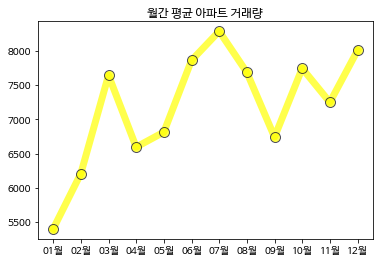

In [71]:
plt.title("월간 평균 아파트 거래량")
plt.plot(df_apt_trade_monthly_mean.index, df_apt_trade_monthly_mean['호수 (호수)'], marker='o', mec='#000033', ms=10, lw=7, color='#FFFF00', alpha=0.7)